In [2412]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [2413]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *

In [2414]:
%matplotlib notebook

In [2452]:
Year = "2019"
Month = "09"
Day = "29"
BeadNumber = 1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [2453]:
Data_File_Number=5
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Data_File_Number
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
res = 2**12
#res=50000
data=BDF.xyz
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]
xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

/home/data_transfer/data_from_windows/20190929/Bead1/InitialTest/Data5.h5
No cantilever data


<IPython.core.display.Javascript object>


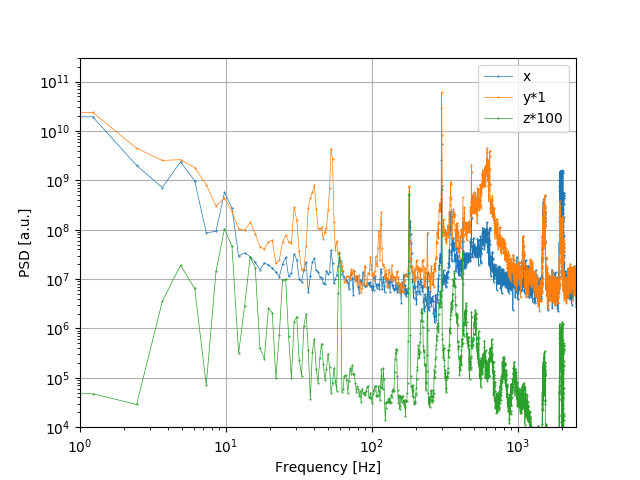

0.0 maximum x
300.29296875 maximum y
1320276.1220436266 minimum x
2227931.5210095122 minimum y
/home/data_transfer/data_from_windows/20190929/Bead1/InitialTest/Data5.png


In [2454]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e4,5*np.max(ypsd))
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")

ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.png" % Data_File_Number
print(ofname)
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata
plt.savefig(ofname, dpi =300)


In [2721]:
Compare_File_1 = 47
Compare_File_2 = 52

fname_1 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_1
fname_2 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_2

res = 5000

BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz
#res=50000

res = 5000
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)
spsd1, freqs1_s = matplotlib.mlab.psd(BDF.spin_data, Fs = fsamp*10, NFFT = res*10)

BDF = BeadDataFile.BeadDataFile(fname_2)
data2 = BDF.xyz
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)
spsd2, freqs2_s = matplotlib.mlab.psd(BDF.spin_data, Fs = fsamp*10, NFFT = res*10)


No cantilever data
No cantilever data


<IPython.core.display.Javascript object>


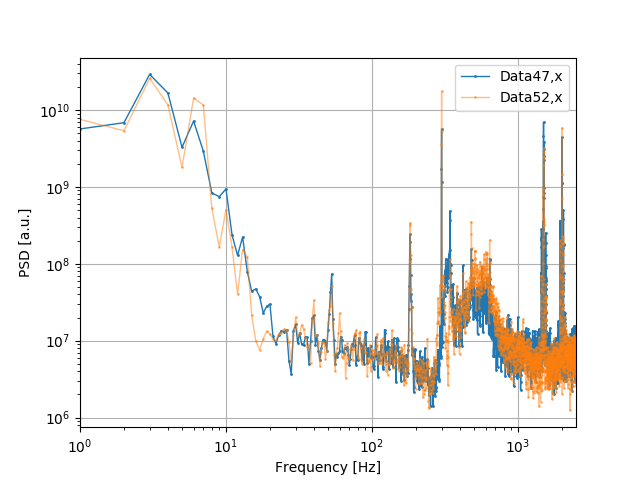

In [2722]:
_,ax = plt.subplots()
label1='Data%d,x' % Compare_File_1
label2='Data%d,x' % Compare_File_2
ax.loglog(freqs1, xpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata

#plt.savefig(ofname)

<IPython.core.display.Javascript object>


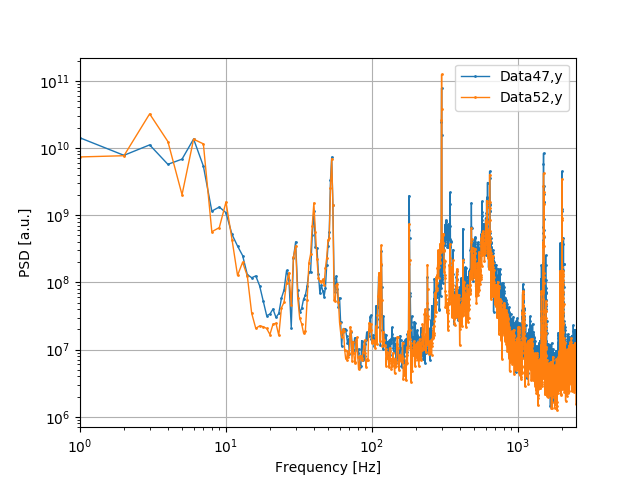

In [2723]:
_,ax = plt.subplots()
label1='Data%d,y' % Compare_File_1
label2='Data%d,y' % Compare_File_2
ax.loglog(freqs1, ypsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, ypsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
#plt.savefig(ofname)

<IPython.core.display.Javascript object>


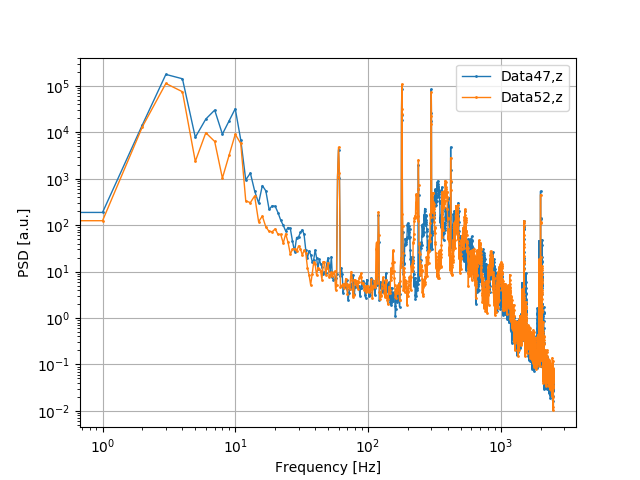

In [2724]:
_,ax = plt.subplots()
label1='Data%d,z' % Compare_File_1
label2='Data%d,z' % Compare_File_2
ax.loglog(freqs1, zpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zpsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(100,175)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
#plt.savefig(ofname)

<IPython.core.display.Javascript object>


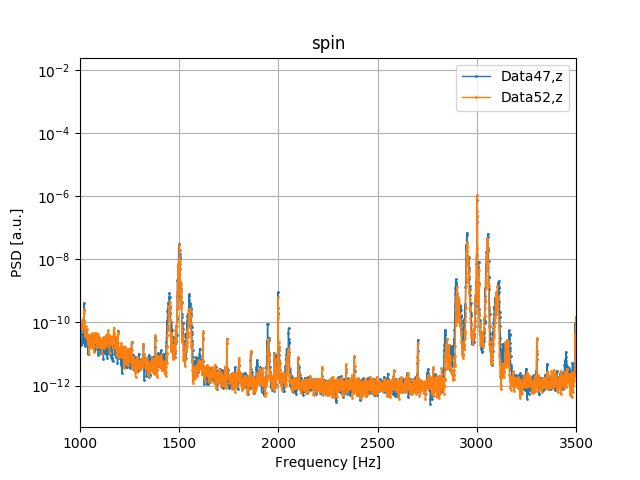

In [2725]:
_,ax = plt.subplots()
label1='Data%d,z' % Compare_File_1
label2='Data%d,z' % Compare_File_2
ax.semilogy(freqs1_s, spsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.semilogy(freqs2_s, spsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
ax.set_title('spin')

plt.xlim(1000,3500)
#plt.ylim(1e5,1e10)
# plt.xscale("log")
plt.grid(True)

<IPython.core.display.Javascript object>


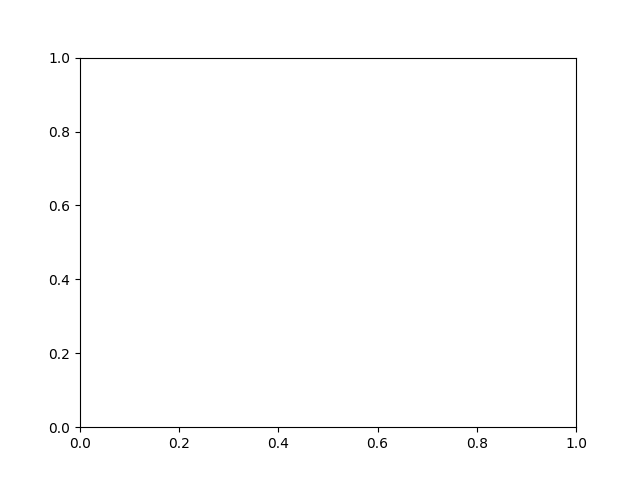

ValueError: operands could not be broadcast together with shapes (10001,) (20001,) 

In [2425]:
_,ax = plt.subplots()
ax.semilogy(freqs1_s, spsd1/spsd2, '.-', label=label1,markersize=2,linewidth=1)
plt.xlim(0,20000)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


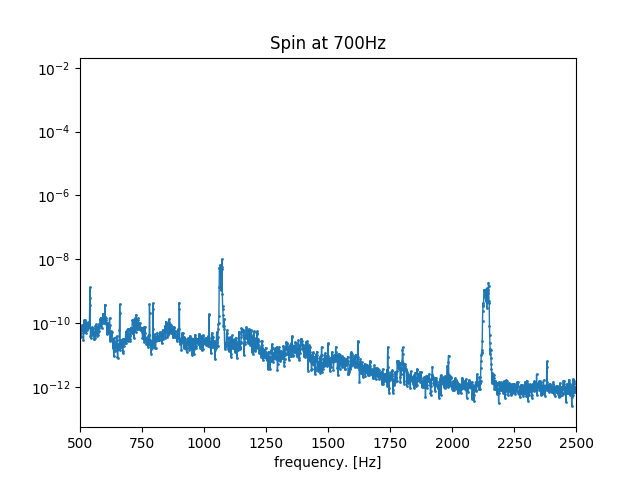

[(500, 2500), Text(0.5, 0, 'frequency. [Hz]'), Text(0.5, 1.0, 'Spin at 700Hz')]

In [2411]:
_,ax = plt.subplots()
ax.semilogy(freqs1_s, spsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.set(xlim=(500,2500), xlabel='frequency. [Hz]', title='Spin at 700Hz')

In [2223]:
foldername = '/home/data_transfer/data_from_windows/20190917/Bead1/Discharge/'
bdf = load_dir(foldername)

241  files in folder
241  files loaded


<IPython.core.display.Javascript object>


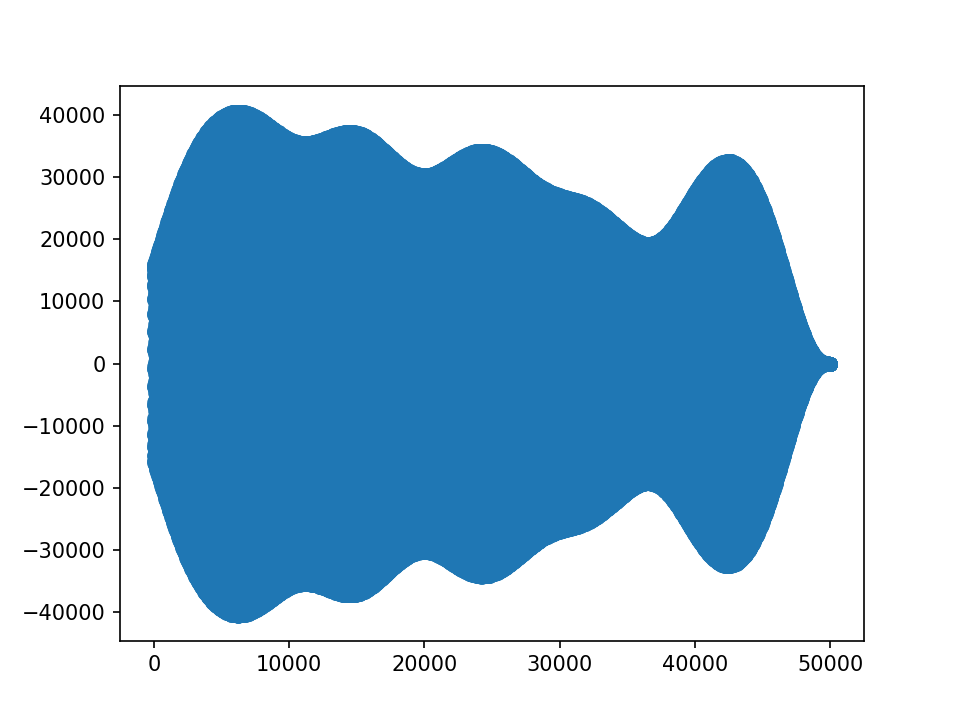

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [692]:
bb = bdf[-14]
_,ax = plt.subplots()
# ax.semilogy(*bb.welch_psd('z',res = 5000))
# ax.set(xlim=(100,200))
ax.scatter(range(50000),bb.response_at_freq('x',drive_freq=151))